<center><h1> Phys 2005L Lab: <br> Measuring the Local Acceleration due to Gravity </h1></center>
<h2>Introduction</h2>


In this lab we will study objects falling under gravity.
Our goals are:
 - to measure the acceleration due to gravity, $g$
 - to test the hypothesis that *all objects*, regardless of mass, size or shape, experience the same acceleration due to gravity

For the experiment, we will drop balls of different weights from a large height. We will use a high-speed camera to record the ball falling, then analyze the video to obtain the position as a function of time. 
From an analysis of the position vs time data, we can extract a measurement of the acceleration due to gravity. We can also explore the question of whether all objects experience the same acceleration due to gravity.




### Pre-Lab Warm-up Exercise

Consider an object falling under gravity. 
We will consider only motion in the vertical ($y$) direction. 
We will consider the $y$-axis direction to be positive going upward,  and thus the acceleration due to gravity is $-g$. 
Suppose the object begins with some initial height $y_0$, and some initial velocity $v_0$ along $y$. 

What is the expression for $y(t)$, the height of the object at some later time $t$?

Now consider the sample data below, where the height of the object above the ground is measured at intervals of 0.1s, giving the following datasets. 
Use the example code below to plot the height as a function of time.
What is the initial height of the object in this example?
To extract more information, you can fit a quadratic function to this data, 
as shown in the example code. 
Assuming the function is of the form: at^2 +bt +c, how do the extracted parameters a,b,c relate to the fundamental parameters of the motion discussed above?

In this test dataset, what are the values of the acceleration and of the initial velocity?



[-5.09848109  0.23173429  4.95065971]
Fitted param a =  -5.098481088306837


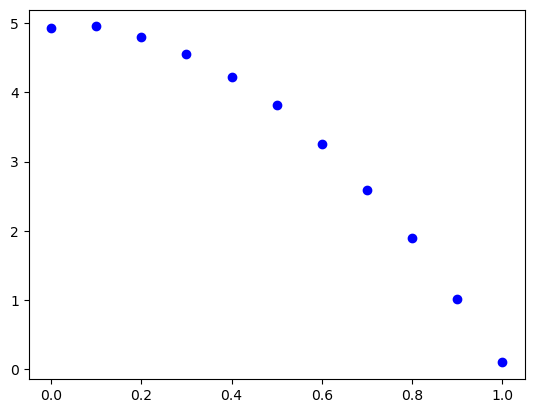

In [1]:
test_time = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
test_height = [4.930987235624798, 4.95337759952138, 4.794670902975914, 4.548672820224848, 4.215721781350154, 3.8137687000766776, 3.257561198862733, 2.5906982881888108, 1.8912209790376122, 1.0111272143641454, 0.09483647998803768]


import matplotlib.pyplot as plt
plt.plot(test_time,test_height,'ob')

# here is how we can fit a quadratic function (polynomial of degree 2) to this data
import numpy as np
fit_results = np.polyfit(test_time,test_height,deg=2)
print(fit_results)
# the fit_results here is a list of the fitted polynomial coefficients, in order of largest powers
# so for degree=2, this will return [a,b,c] in the fitted ax^2 +bx +c
# we can get the values separately as fit_results[i]:
print("Fitted param a = ",fit_results[0])




### Taking the Data

A ball-drop apparatus will be setup, with a  high-speed camera to record the motion of the ball.
You will drop a rubber ball, a weighted rubber ball, and a soft foam ball. 
(Note that you should record the weight and diameter of each ball, as we will use this information in the next lab for a more detailed analysis of the effect of air resistance). The video of each ball drop should be recorded, and will be analyzed to obtain the position as a function of time

### Video Analysis  with Capstone Software

Here we will describe briefly how to analyze the video data using the *Capstone software* that is installed on the computers in the physics lab.
Other methods of video analysis are also possible; an example of how to use the free software package *ImageJ* is provided in the [Appendix](#AppImageJ)
Be aware that the content/format of your final data may vary a little bit depending on the method used, and that this may need to be accounted for before analysing the data. 


Open the Capstone software package, and select 'Video Analysis'. Then open the video recording of the ball drop. You will need to calibrate the distance scale. The backdrop for the experiment has lights placed 1 meter apart that you can use for calibration. The camera frame rate can be used to convert from frame count to seconds. 
Select 'Track Object' to follow the ball and obtain the position as a function of time. 

In selecting the frames for analysis, you may want to cut initial frames before the motion begins,
and to stop just before the ball bounces at the bottom. 

At the end, export your data in CSV format for further analysis. 




### Reading and Preparing the Data for Analysis

After the video analysis, the data for position and time should be exported in CSV ("comma-separated value") format. This is a common format used for column/row data.

Depending on the content of the exported data, some of the following additional steps may be needed before you can perform your analysis of the data

In [2]:

# create the arrays that will hold the TIme & Position data
Time = []
Position = []

## The data should have been exported as a CSV ("Comma-separated value") file
## this is a common format for column/row data, and there are libraries to read it in python
import csv

#with open('ball1.csv', 'r') as file:
with open('FreeFall_Lab/Weighted Ball.csv', 'r') as file:
#with open('FreeFall_Lab/Unweighted Ball.csv', 'r') as file:
#with open('FreeFall_Lab/Light Ball.csv', 'r') as file:
#with open('FreeFall_Lab/Foam Ball.csv', 'r') as file:

    reader = csv.reader(file)
    for row in reader:
        
        #Take only the Y position data, based on the index of its column
        Position.append(row[1])
        
        #Take only the Time data
        Time.append(row[0])
        
#check what we just read:
print(Time)
print(Position)

print(len(Position))

# Probably you will see that the first entry in each array is just the Header telling us the name of the column
# We dont want this - we just want 
# we can drop this header entry by using *list slicing*
# the syntax for this is:   new_list = old_list[new_first_index:new_last_index]
# and if we leave eg 'new_last_index' blank, it will default to the end of the array

# so if we want to drop the first entry only:
Time = Time[1:]
Position = Position[1:]

# It may be the same case that the first few entries in your data table correspond to video frames before the ball actually started moving
# In that case, they dont correspond to physical motion, so we should drop them before analysis
# eg if we wanted to drop the first 3 frames, we could do:
#Time = Time[3:]
#Position = Position[3:]

# It is also possible that the last few entries in your data may correspond to video frames after the ball bounces
# this part of the motion doesnt correspond to freefall, so we wont try to analyse it
# in that case, we could drop eg the last 4 frames by:

#Time = Time[:-4]
#Position = Position[:-4]
#print(len(Position)) # to check how many frames still remain


#Make sure you do any slicing identically  to both Position and Time arrays, so they are always in synch!

# print again to check what we have done:
print(Time)
print(Position)

# The CSV data may have been exported in the form of a 'string' (meaning a "string of characters") rather than a number
# if that is so, you may see quotation marks around each entry when you print it
# in that case, we will need to explicitly convert these entries into numbers ('floats' = floating-point numbers)

# a convenient way to do this is:
Time = [float(t) for t in Time]
Position = [float(y) for y in Position]

# print again to check what we have done:
print(Time)
print(Position)

# It is likely that the video was started before the ball was dropped, so the time reading for the start of motion
# is probably not zero. It would be nice to set it to zero
# we can do this by subtracting the offset, ie the first time value Time[0]
Time = [t-Time[0] for t in Time]


# print again to check what we have done:
print(Time)
print(Position)


# If your time data is still in the form of *frame count*, rather than seconds
# then you need to convert it to seconds as follows:
# frames_per_second = 30
# Time_in_sec = [ t_in_frames/frames_per_second for t_in_frames in Time]


# If your position data is still in the form of *pixels*, rather than meters
# you could convert to meters as follows: (adjust the numbers as needed)
# pixel_offset = 100 
# pixels_per_m = 254
# Position_in_meters = [(ypix - pixel_offset)/pixels_per_m for ypix in Position]




['\ufeff"Time (s) Run #1"', '0.767', '0.800', '0.833', '0.867', '0.900', '0.933', '0.967', '1.000', '1.033', '1.067', '1.100', '1.133', '1.167', '1.200', '1.233', '1.267', '1.300', '1.333', '1.367', '1.400', '1.433', '1.467', '1.500', '1.533', '1.567', '1.600', '1.633', '1.667', '1.700', '1.733', '1.767']
['y-Position, Object #4 (m) Run #1', '5.08', '5.06', '5.04', '5.02', '4.98', '4.94', '4.86', '4.79', '4.70', '4.60', '4.50', '4.39', '4.25', '4.12', '3.96', '3.80', '3.62', '3.45', '3.23', '3.03', '2.81', '2.57', '2.32', '2.08', '1.81', '1.54', '1.25', '0.96', '0.64', '0.33', '0.02']
32
['0.767', '0.800', '0.833', '0.867', '0.900', '0.933', '0.967', '1.000', '1.033', '1.067', '1.100', '1.133', '1.167', '1.200', '1.233', '1.267', '1.300', '1.333', '1.367', '1.400', '1.433', '1.467', '1.500', '1.533', '1.567', '1.600', '1.633', '1.667', '1.700', '1.733', '1.767']
['5.08', '5.06', '5.04', '5.02', '4.98', '4.94', '4.86', '4.79', '4.70', '4.60', '4.50', '4.39', '4.25', '4.12', '3.96', '3.8

### Analysing the Data

Now that you have the data in the correct format, you can analyse it. Use the example code in the initial Warm-up Exercise above to help you plot the position of each ball as a function of time. By fitting the appropriate function, obtain the parameters describing the data, and relate them to the physical motion as above. 

### Interpretation, Sources of Error, and Conclusions

What did you find for the acceleration (assumed constant) of each ball?
Which of these might approximate the true value of $g$, and what is the main reason why some others do not?

For the second goal, to test the hypothesis that all objects experience the same acceleration due to gravity,
what is your conclusion based on this experiment?

What are potential sources of error for this experiment?
(We are not asking for a detailed quantitative error analysis, just to consider where errors may arise)

## Assignment

Submit a **lab report** for this experiment. 
<br>
Your report should include a short introduction and motivation for the experiment, and a description of how the experiment was performed. It should include the data that you obtained, the plots and the extracted fit parameters, and how the fit parameters relate to the physical motion. 
Include a short discussion of potential sources of error in this experiment.
Give your conclusions regarding the measurement of $g$, and the test of the hypothesis that all objects experience the same acceleration due to gravity. 

You are encouraged to discuss your analysis, results and interpretation with other group members, 
but your submitted lab report should be your own work. 

Refer to the Lab Report Guidance document on Canvas for more information on how to structure the lab report.

### Appendix: Video Analysis with ImageJ {#AppImageJ}

ImageJ is a free software package that can be used for video analysis.

To find the path of the ball, first open your video in imageJ by dragging and dropping the file onto the main window. Before doing any tracking, we first need to find our conversion factor from pixels to meters. This can be done very easily by selecting the "straight" tool and drawing a line between two of the white bands in the image. Then select "Analyze>Measure" and read off the length value. To make the object easier to track, we will go to "Image>Adjust>Canvas Size" Then enter a width number (about 100 should do). Make sure position is set to center and press ok. Play the video and make sure the ball is never out of frame. If it is, re-open the video and use a larger value. Now we need to apply a threshold to the image. We do this by going to "Image>Adjust>Threshold". Experiment with different methods and threshold values until the ball is the only colored object in the video (using method Huang with values 19 and 255 should produce good results, but will still require some changes depending on the video). Once you have found a good threshold click "Set" and then "Apply", uncheck the box "Calculate threshold for each image" and then press OK. We are now ready to track the motion of the ball. Select "Plugins>Tracking>TrackMate, if it asks to swap Z and T press ok. Since we have already cropped our image, go ahead and click "next". Now change the detector method to "Thresholding detector" and click next. Select "Preview", if you have applied a good threshold earlier, you should see that only 1 object has been detected. Click next. For "Initial Thresholding", make sure the entire range is selected and click next. No filtering is needed, so click next. Selected the "Kalman" tracking method and click next. The default parameters are fine for our case, so click next. No filters are needed, click next. Now select the "Tracks" button and click "Export as CSV".

